# Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [9]:
df = pd.read_csv("bank2.csv")

# Displaying the data

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in any column of the dataset

<Axes: >

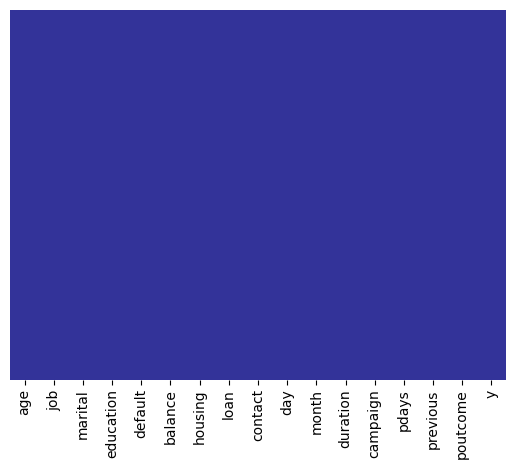

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='terrain')

<Axes: xlabel='y', ylabel='count'>

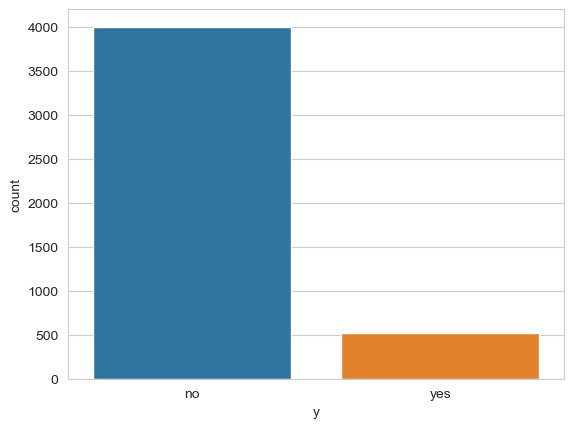

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=df)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [16]:
distinct_job_count = df['job'].nunique()
distinct_job_count

12

<Axes: xlabel='count', ylabel='job'>

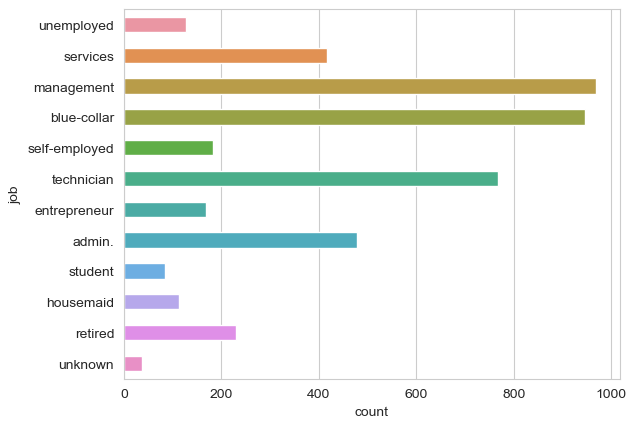

In [17]:
sns.countplot(y='job',width=0.5,data=df)

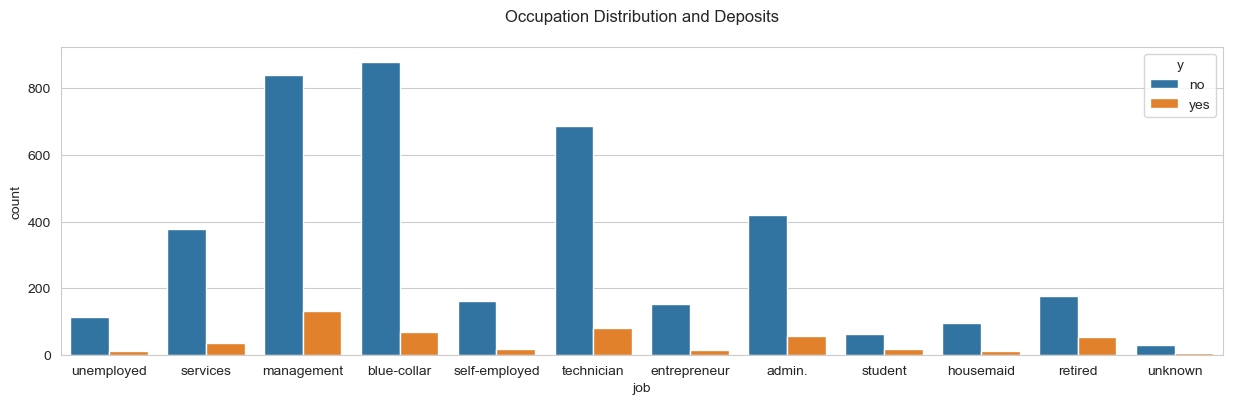

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

In [19]:
distinct_job = df['job'].unique()
distinct_job

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [20]:
distinct_edu = df['education'].unique()
distinct_edu

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [21]:
distinct_edu_count = df['education'].nunique()
distinct_edu_count

4

<Axes: xlabel='count', ylabel='education'>

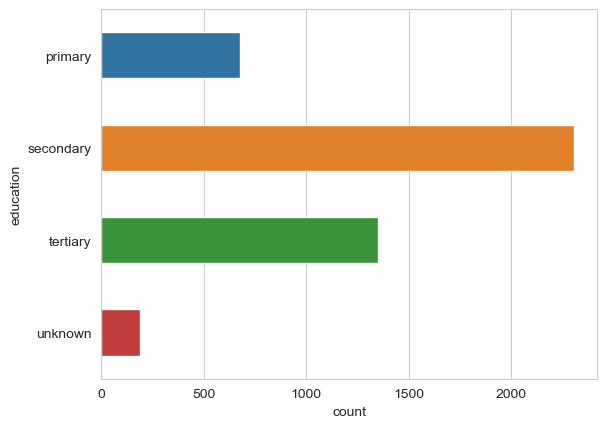

In [22]:
sns.countplot(y='education',width=0.5,data=df)

In [23]:
distinct_def = df['default'].unique()
distinct_def

array(['no', 'yes'], dtype=object)

In [24]:
distinct_def_count = df['default'].nunique()
distinct_def_count

2

<Axes: xlabel='default', ylabel='count'>

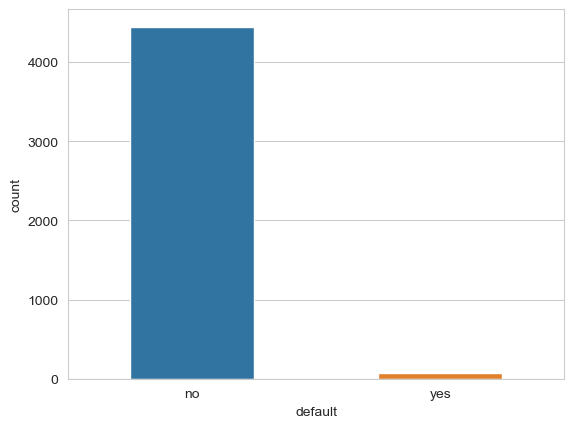

In [25]:
sns.countplot(x='default',width=0.5,data=df)

In [26]:
distinct_housing = df['housing'].unique()
distinct_housing

array(['no', 'yes'], dtype=object)

<Axes: xlabel='housing', ylabel='count'>

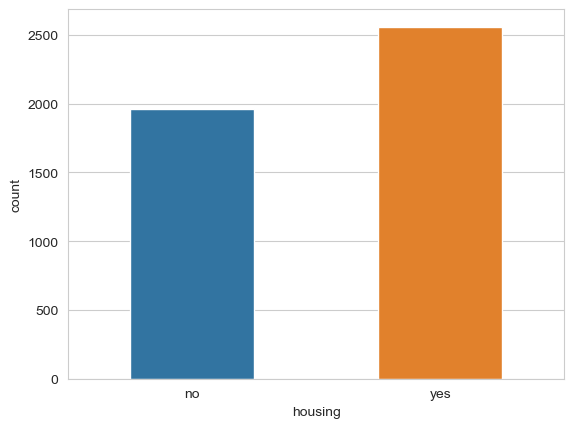

In [27]:
sns.countplot(x='housing',width=0.5,data=df)

In [28]:
distinct_loan= df['loan'].unique()
distinct_loan

array(['no', 'yes'], dtype=object)

<Axes: xlabel='loan', ylabel='count'>

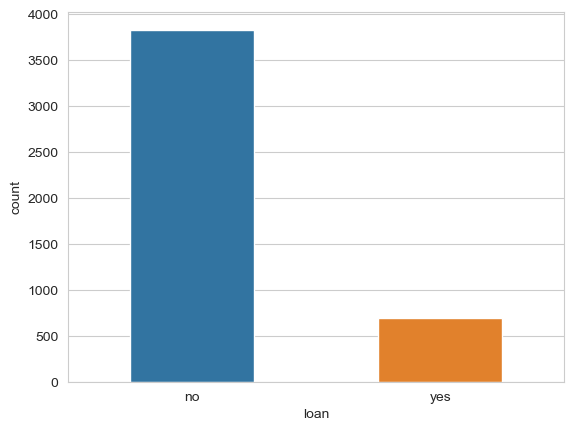

In [29]:
sns.countplot(x='loan',width=0.5,data=df)

In [30]:
distinct_contact = df['contact'].unique()
distinct_contact

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [31]:
distinct_contact = df['contact'].nunique()
distinct_contact

3

<Axes: xlabel='contact', ylabel='count'>

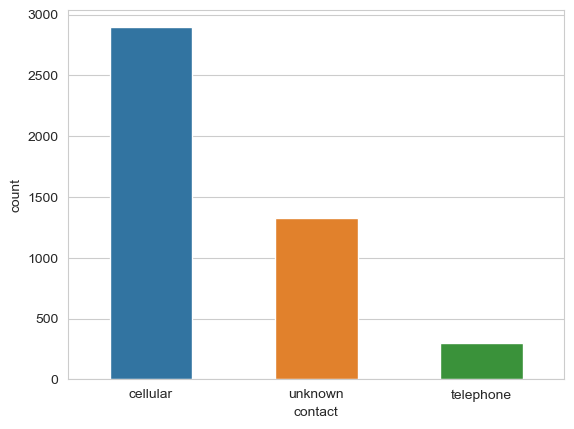

In [32]:
sns.countplot(x='contact',width=0.5,data=df)

In [33]:
distinct_month = df['month'].unique()
distinct_month

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [34]:
distinct_month_count = df['month'].nunique()
distinct_month_count

12

<Axes: xlabel='month', ylabel='count'>

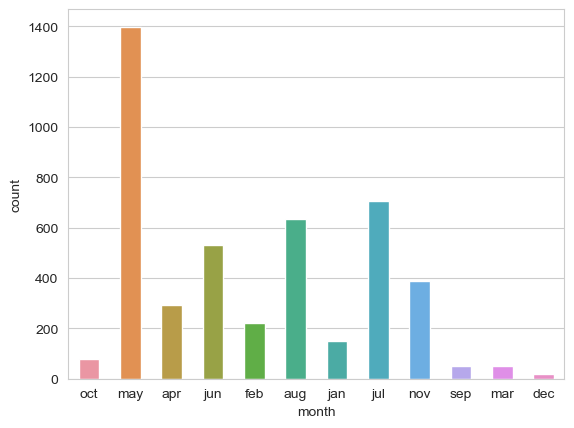

In [35]:
sns.countplot(x='month',width=0.5,data=df)

In [36]:
distinct_poutcome = df['poutcome'].unique()
distinct_poutcome

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [37]:
distinct_poutcome_count = df['poutcome'].nunique()
distinct_poutcome_count

4

<Axes: xlabel='poutcome', ylabel='count'>

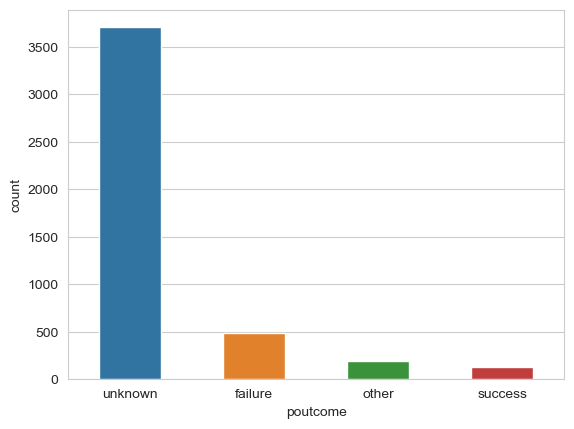

In [38]:
sns.countplot(x='poutcome',width=0.5,data=df)

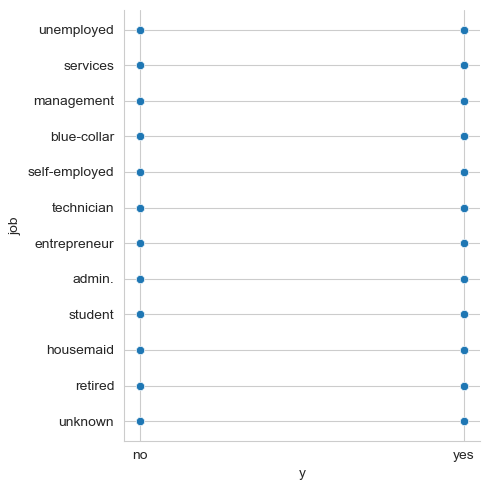

In [39]:
sns.relplot(data=df, y="job", x="y")

In [40]:
def doanes(data):
    n = len(data)
    skewness = ((data - np.mean(data))**3).mean() / (np.std(data)**3)
    sigma_g1 = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    bins = 1 + np.log2(n) + np.log2(1 + abs(skewness) / sigma_g1)
    return int(np.ceil(bins))

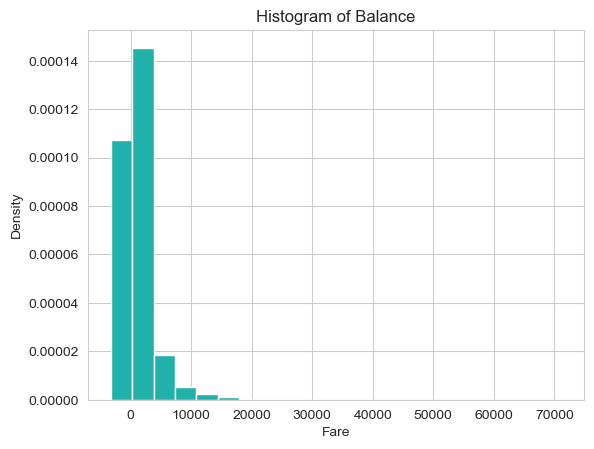

In [41]:
# Calculate the number of bins using Doane's formula
bins = doanes(df['balance'])


# Plot histogram
df['balance'].hist(bins=bins, density=True, color='lightseagreen')
#df['balance'].plot(kind='kde', xlim=(0,600), style='r--')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Histogram of Balance')
plt.show()

<Axes: xlabel='balance'>

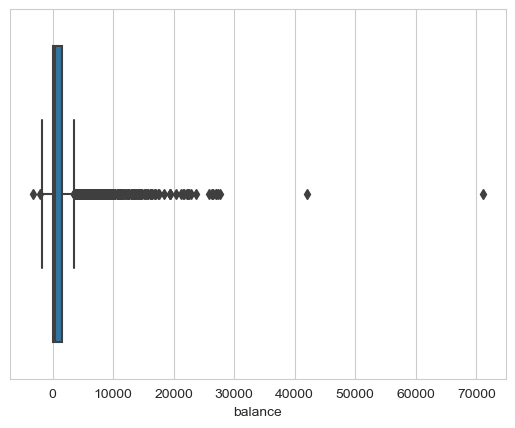

In [42]:
sns.boxplot(x=df['balance'])

The box plot shows a predominantly low balance with significant right-skew and a large number of outliers.
This kind of distribution might suggest economic inequality or diversity in financial statuses among the observed entities.

# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
cols = df.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [45]:
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [46]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


# Correlation Analysis using Heatmap

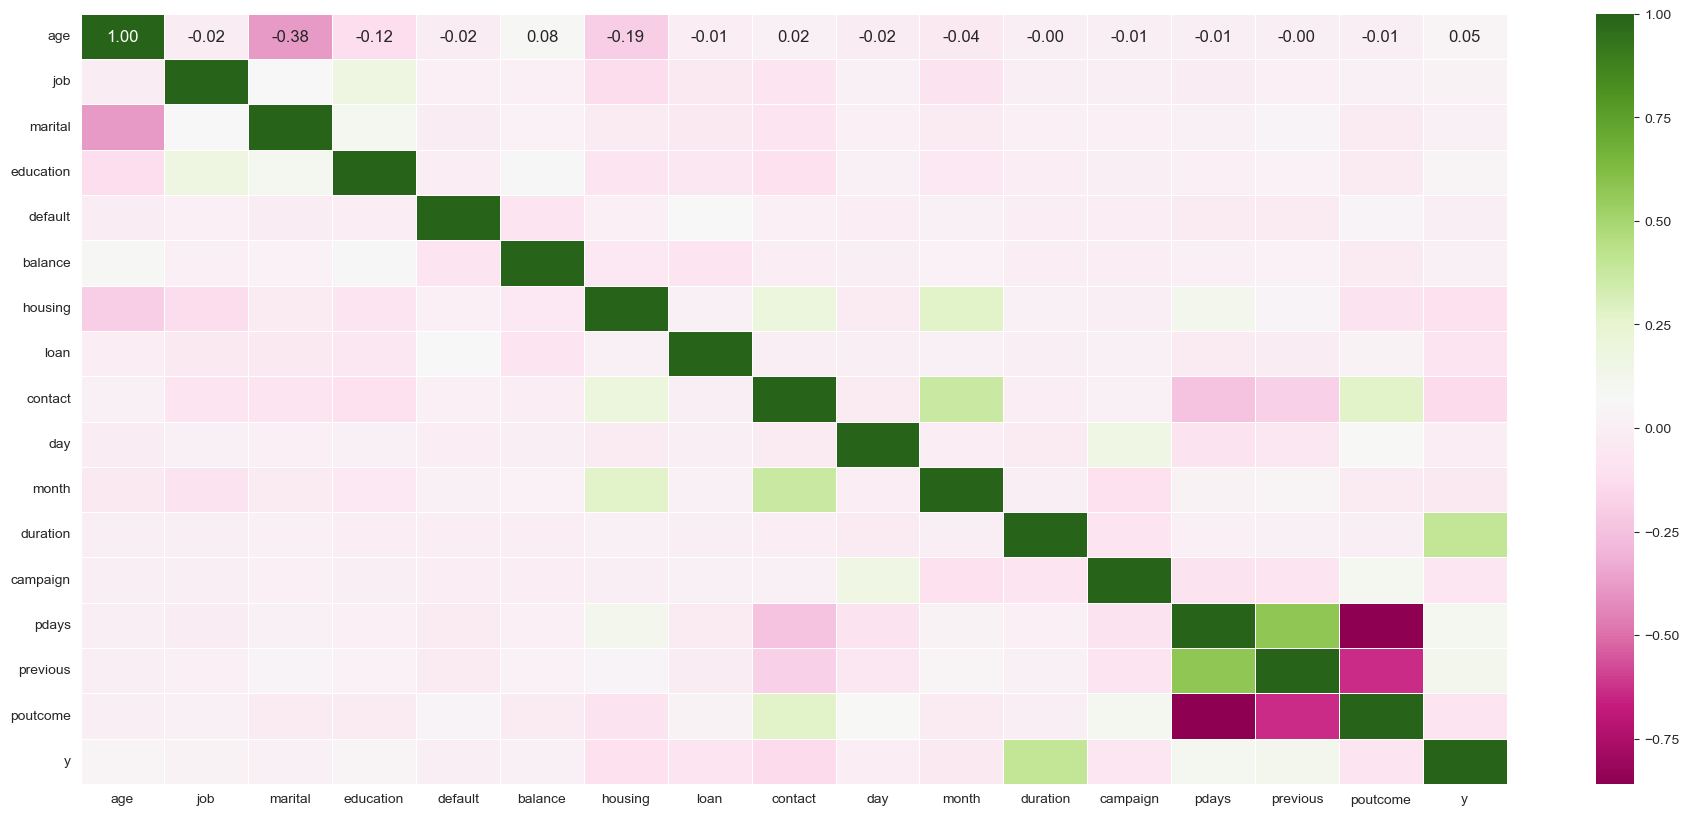

In [102]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True,annot_kws={"size": 12}, fmt=".2f", linewidths=.5)
plt.show()

# Standardisation

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [60]:
X = df.drop("y",axis=1)
y=df.y

In [61]:
scaler = StandardScaler()

In [62]:
#https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python

In [63]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [64]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size=0.3)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
print('Train Score: {}'.format(decision_tree.score(X_train, y_train)))  
print('Test Score: {}'.format(decision_tree.score(X_test, y_test)))  

Train Score: 1.0
Test Score: 0.868828297715549


In [69]:
cross_val_score(decision_tree, X_train, y_train, cv=5).mean()

0.8641005259263703

In [71]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [72]:
ypred = decision_tree.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1208
           1       0.40      0.38      0.39       149

    accuracy                           0.87      1357
   macro avg       0.66      0.66      0.66      1357
weighted avg       0.87      0.87      0.87      1357



# Hyperparameter tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [75]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [80]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}

In [81]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)

In [82]:
cross_val_score(gscv.best_estimator_, X_train, y_train, cv=5).mean() 

0.8897004419381288

In [84]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [85]:
print('Train Score: {}'.format(clf.score(X_train, y_train)))
print('Test Score: {}'.format(clf.score(X_test, y_test)))

Train Score: 0.9140328697850821
Test Score: 0.9042004421518055


In [91]:
y_pred = clf.predict(X_test)

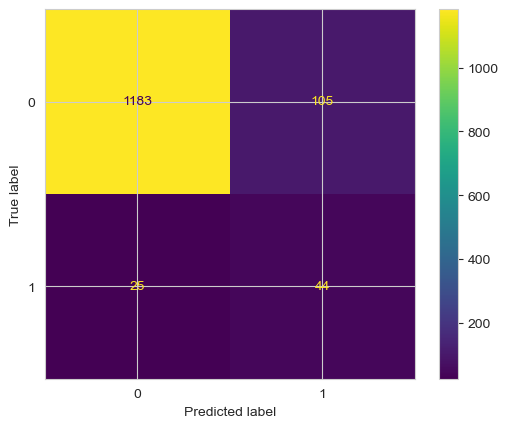

In [94]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [96]:
#Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1288
           1       0.30      0.64      0.40        69

    accuracy                           0.90      1357
   macro avg       0.64      0.78      0.68      1357
weighted avg       0.94      0.90      0.92      1357



In [98]:
#Accuracy Score
accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 90.42004421518055


In [99]:
#Cross Validation Score
Cross_val = cross_val_score(clf, X_test,y_test, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  88.06056001736489


# Visualizing the Tree

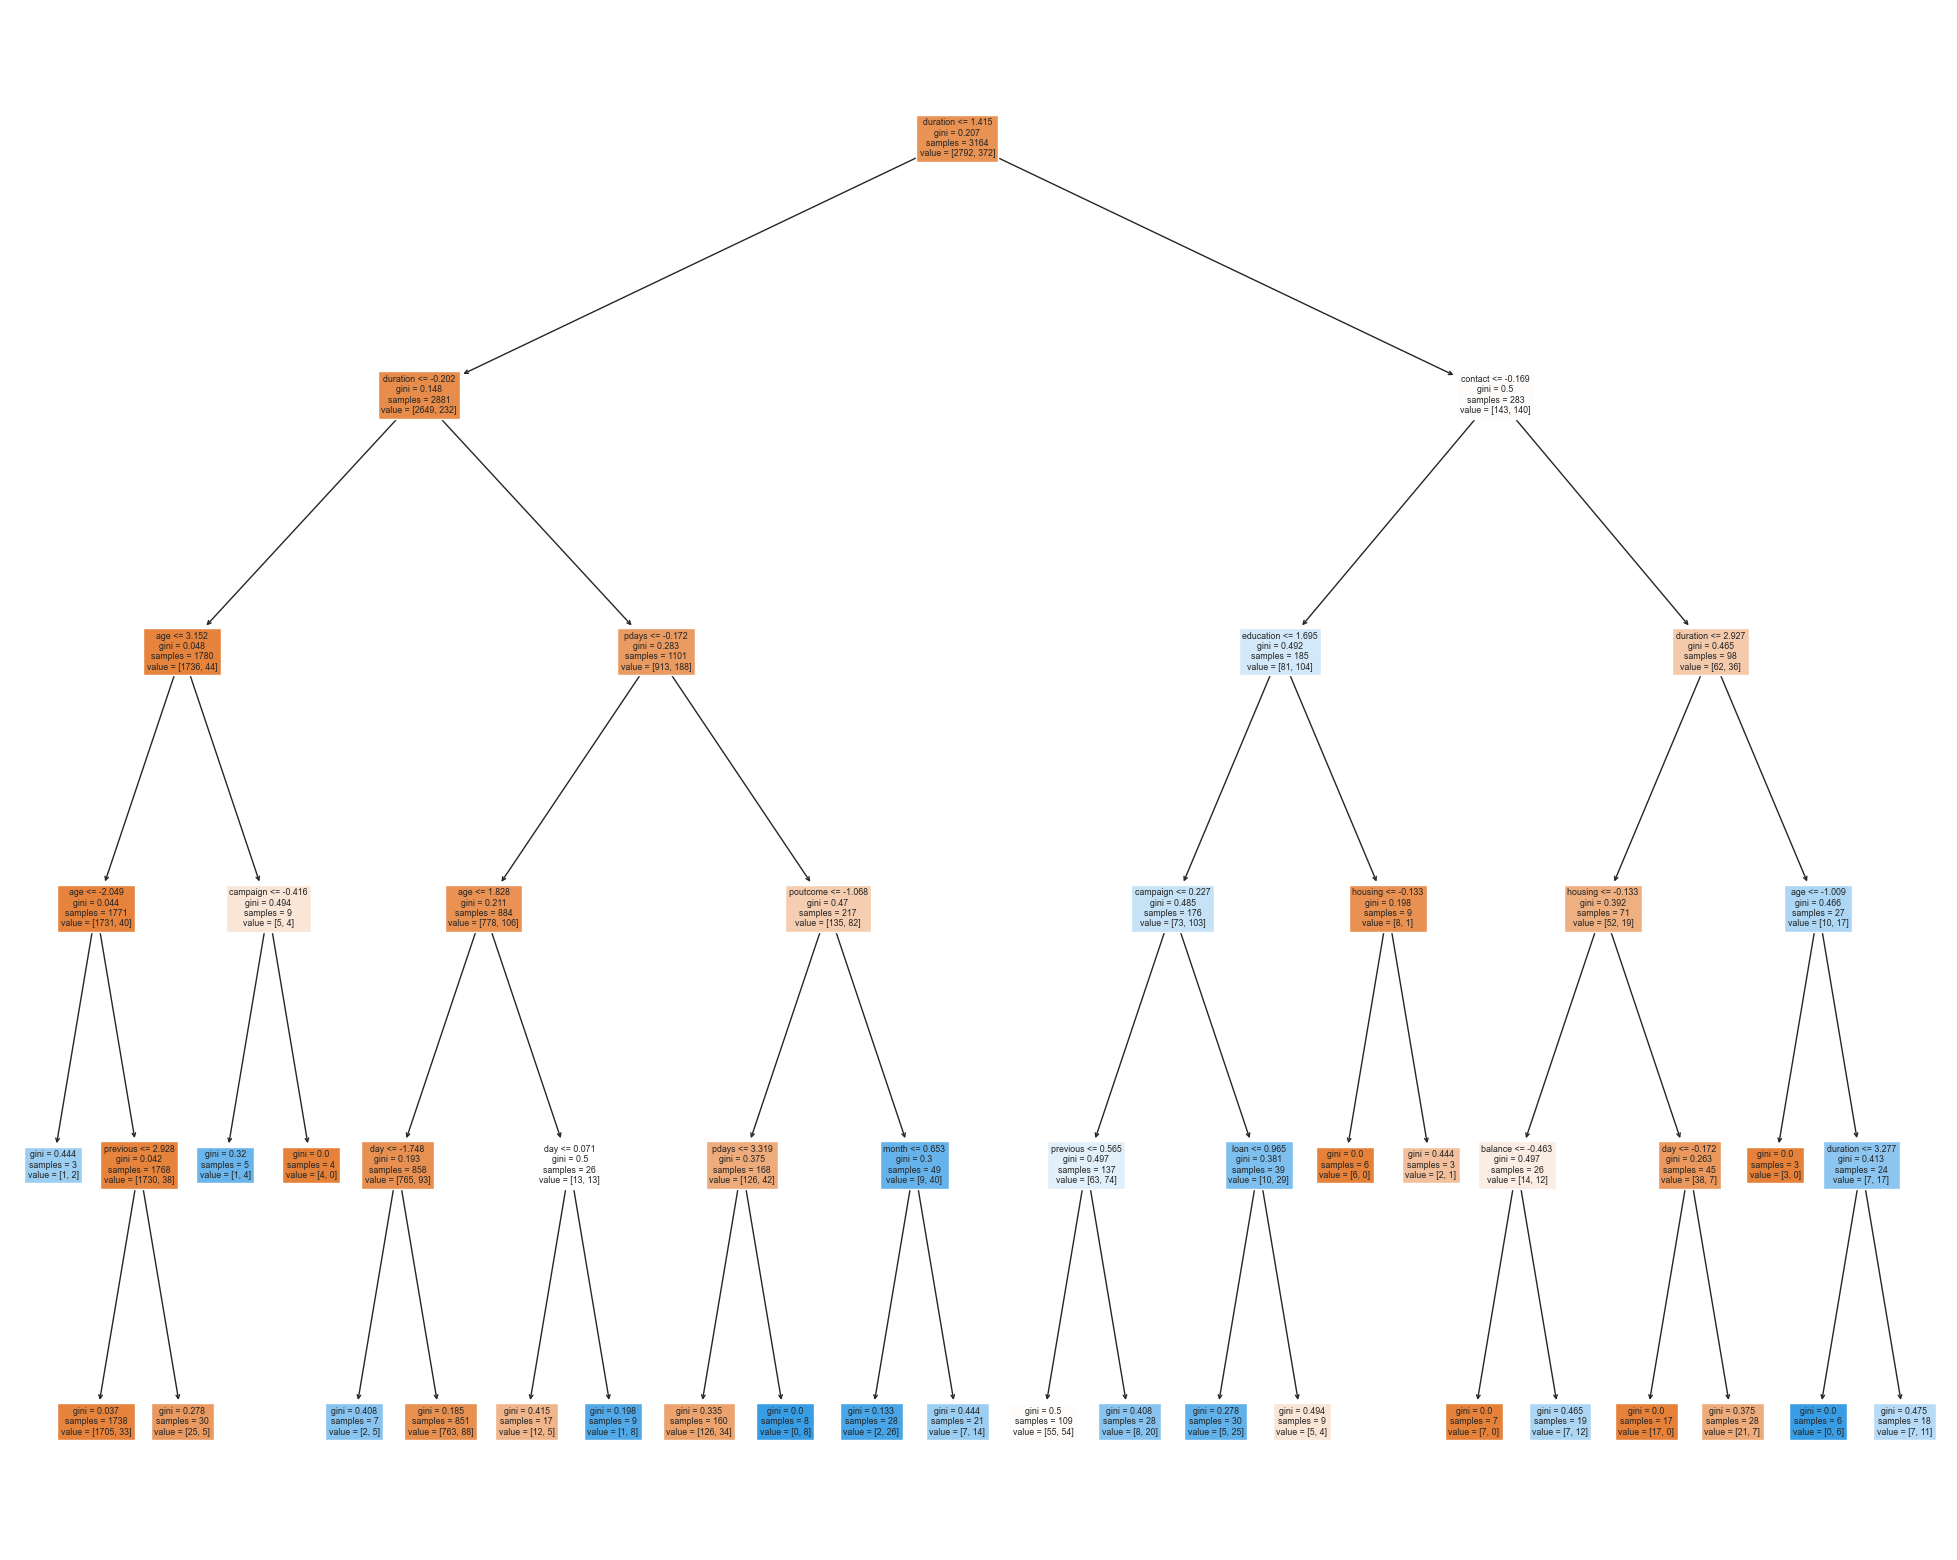

In [100]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

# Findings